In [ ]:
# 1. 문제정의
# iris 데이터 분류
# 1) 머신러닝과 어떤점이 달랐는가
# 2) 딥러닝에서는 어떤곳에 집중하는가

In [1]:
# 2. 데이터 수집
# 기존에 정리되어있던 자료 가져오기
from sklearn.datasets import load_iris
data = load_iris()

In [2]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
# 3. 데이터 전처리
# 결측치, 이상치 처리
X = data['data'] # 문제
y = data['target'] # 정답

In [ ]:
# 4. 탐색적 데이터 분석

In [4]:
# 5. 모델 선택 및 하이퍼 파라미터 튜닝 > 머신러닝
# 5. 모델 설계 및 학습 방법 설정 > 딥러닝
# 데이터 나누기(train, test) - 데이터를 전처리 완료한후에 사용하자
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [6]:
X_train.shape

(105, 4)

In [17]:
# 5-1 모델 설계
from tensorflow.keras import Sequential # 딥러닝 모델의 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 하나의 층의 디자인
# inputLayer : 데이터를 받아오는 역할, 데이터의 형태 지정
# Dense : 데이터를 분석

# DNN(Deep neural network)
# MLP(Multi Layer Perceptron) > InputLayer와 Dense만 사용
model = Sequential() 
# 입력층
model.add(InputLayer(input_shape = (4,))) # 하나씩의 데이터를 입력 받음
# 전체 몇개의 데이터가 들어오는지는 몰라도됨
# 한번에 몇개가 들어오는지는 알아야함 > 붓꽃 데이터의 특성(꽃잎 길이, 꽃잎 넓이, 꽃받침 길이, 꽃받침 넓이)
# 중간층(2개층)
model.add(Dense(units = 32, activation = 'relu'))
# units : 퍼셉트론의 숫자(생각하는 방법의 수)
# activation : 다음층에 값을 전달하는 방법
model.add(Dense(units = 32, activation = 'relu'))
# 출력층
# units : 퍼셉트론의 숫자(생각하는 방법의 수) > 출력해야하는 정답의 종류
# activation : 다음층에 값을 전달하는 방법 > 마지막층은 값을 종합해서 결론
model.add(Dense(units = 3, activation = 'softmax'))

In [18]:
# 5-2 학습방법설정
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [19]:
# 6. 학습
# epochs = 100, 100번동안 발전하는 딥러닝 모델
history = model.fit(X_train, y_train, epochs = 100)
# 전에 학습했던 내용을 기억

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 1.5015 - accuracy: 0.3429
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2839 - accuracy: 0.3429
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.1263 - accuracy: 0.3429
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0131 - accuracy: 0.3429
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9416 - accuracy: 0.6571
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8923 - accuracy: 0.9524
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8577 - accuracy: 0.9714
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8235 - accuracy: 0.9048
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7931 - accuracy: 0.7714
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7667 - accuracy: 0.7524
Epoch 11/100
4/4 [===========

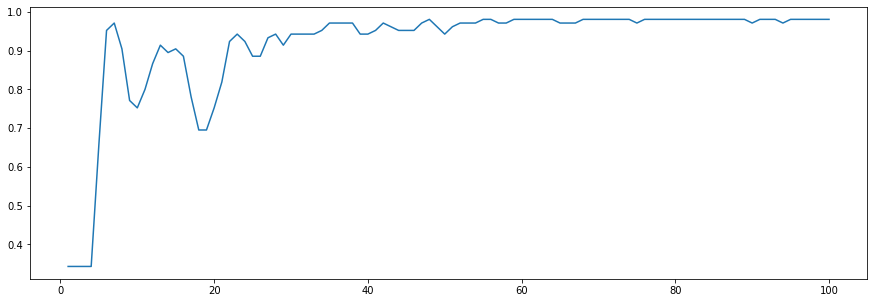

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(range(1,101),
        history.history['accuracy'],
        label='accuracy')
plt.show()

In [22]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 102ms/step


array([[9.99487162e-01, 5.12796978e-04, 1.03621405e-08]], dtype=float32)